In [24]:
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Read & Process

## Read equities data

In [2]:
equity = 'data.xlsx'
xlsx_equity = pd.ExcelFile(equity)
list_equity = xlsx_equity.sheet_names
print(f"Equity:\n{list_equity}")

dict_equity_df = {}
for ticker in list_equity:
    # print(ticker)
    df_eq = pd.read_excel(xlsx_equity, ticker) \
        .sort_values('Date') \
        .set_index('Date')
    dict_equity_df[ticker] = df_eq

df_eq.info()

Equity:
['AAPL', 'MSFT', 'NVDA', 'AMZN', 'META', 'GOOGL', 'BRK.B', 'GOOG', 'AVGO', 'TSLA', 'SPY_ETF', 'DAXEX_ETF', 'CAC40_ETF', 'NKY225_ETF', 'DJIA_ETF', 'EQQQ_ETF', 'FTSE_ETF']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3613 entries, 2024-10-31 11:00:00 to 2025-01-07 16:40:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3613 non-null   float64
 1   High    3613 non-null   float64
 2   Low     3613 non-null   float64
 3   Close   3613 non-null   float64
 4   Volume  3613 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 169.4 KB


In [3]:
dict_equity_df['NVDA']

,Open,High,Low,Close,Volume
Date,,,,,
2024-10-14 16:30:00,136.4700,138.2400,136.300,137.9800,13386017
2024-10-14 16:35:00,137.9900,138.3200,137.740,138.0400,5526932
2024-10-14 16:40:00,138.0450,138.2400,137.510,137.6000,4546174
2024-10-14 16:45:00,137.6000,138.1100,137.450,138.1000,4700399
2024-10-14 16:50:00,138.1000,138.6600,137.860,138.6400,5779923
...,...,...,...,...,...
2025-01-06 22:35:00,150.3950,150.4800,149.920,149.9900,1801855
2025-01-06 22:40:00,149.9976,150.2900,149.740,149.8101,1751403
2025-01-06 22:45:00,149.8150,149.8399,148.255,148.8970,4672179


## Read cryptocurrencies data

In [4]:
crypto = 'data_crypto.xlsx'
df_crypto = (
    pd.read_excel(crypto)
    .rename(columns={'OpenTime': 'Date'})
    .drop(columns=['Unnamed: 0'])
)

df_crypto['Date'] = pd.to_datetime(df_crypto['Date'])

list_crypto = df_crypto.Symbol.unique().tolist()
print(f"Crypto:\n{list_crypto}")

dict_crypto_df = {}
for ticker in list_crypto:
    df_cry = df_crypto[df_crypto['Symbol']==ticker] \
        .drop(columns=['Symbol']) \
        .set_index('Date')
    dict_crypto_df[ticker] = df_cry

df_cry.info()

Crypto:
['ADAUSDT', 'AVAXUSDT', 'BNBUSDT', 'BTCUSDT', 'DOGEUSDT', 'ETHUSDT', 'SOLUSDT', 'TRXUSDT', 'USDCUSDT', 'XRPUSDT']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 27361 entries, 2024-10-04 20:00:00 to 2025-01-07 20:00:00
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    27361 non-null  float64
 1   High    27361 non-null  float64
 2   Low     27361 non-null  float64
 3   Close   27361 non-null  float64
dtypes: float64(4)
memory usage: 1.0 MB


In [5]:
dict_crypto_df['BNBUSDT']

,Open,High,Low,Close
Date,,,,
2024-10-04 20:00:00,555.30,556.40,555.20,556.30
2024-10-04 20:05:00,556.30,556.70,556.00,556.50
2024-10-04 20:10:00,556.50,556.60,555.80,556.00
2024-10-04 20:15:00,556.00,556.40,555.80,555.90
2024-10-04 20:20:00,555.80,555.90,555.50,555.50
...,...,...,...,...
2025-01-07 19:40:00,697.38,697.47,696.85,697.21
2025-01-07 19:45:00,697.20,697.62,696.04,696.32
2025-01-07 19:50:00,696.32,697.50,696.18,696.85


# Pair Trading Example

## Prepare the pair trading series

In [7]:
ticker_eqt = 'NVDA'
ticker_cpy = 'BNBUSDT'

price_eqt = dict_equity_df[ticker_eqt]['Close'].rename(ticker_eqt)
t00 = price_eqt.index[0]
t01 = price_eqt.index[-1]

price_cpy = dict_crypto_df[ticker_cpy]['Close'].rename(ticker_cpy)
t10 = price_cpy.index[0]
t11 = price_cpy.index[-1]

merged = pd.concat([price_eqt, price_cpy], axis=1)

if t00 > t10:
    t0 = t00
else:
    t0 = t10

df_price = merged.loc[t0:].dropna()

In [8]:
df_price.head()

,NVDA,BNBUSDT
Date,,
2024-10-14 16:30:00,137.98,588.6
2024-10-14 16:35:00,138.04,588.7
2024-10-14 16:40:00,137.60,589.0
2024-10-14 16:45:00,138.10,588.1
2024-10-14 16:50:00,138.64,588.0


In [9]:
def process_pairs_series(seriesA, seriesB, dictA, dictB):

    priceA = dictA[seriesA]['Close'].rename(seriesA)
    t00 = priceA.index[0]
    
    priceB = dictB[seriesB]['Close'].rename(seriesB)
    t10 = priceB.index[0]
    
    merged = pd.concat([priceA, priceB], axis=1)
    
    if t00 > t10:
        t0 = t00
    else:
        t0 = t10

    # remove those missing inbetween timestamps data
    return merged.loc[t0:].dropna()

In [10]:
ticker_eqt = 'NVDA'
ticker_cpy = 'BNBUSDT'

price_pairs = process_pairs_series(ticker_eqt, ticker_cpy, dict_equity_df, dict_crypto_df)

In [11]:
price_pairs

,NVDA,BNBUSDT
Date,,
2024-10-14 16:30:00,137.9800,588.60
2024-10-14 16:35:00,138.0400,588.70
2024-10-14 16:40:00,137.6000,589.00
2024-10-14 16:45:00,138.1000,588.10
2024-10-14 16:50:00,138.6400,588.00
...,...,...
2025-01-06 22:35:00,149.9900,728.69
2025-01-06 22:40:00,149.8101,728.50
2025-01-06 22:45:00,148.8970,727.96


## Check for Cointegration and Correlation

In [12]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [13]:
price_eqt = price_pairs[ticker_eqt]
price_cpy = price_pairs[ticker_cpy]

In [17]:
price_eqt

Date
2024-10-14 16:30:00    137.9800
2024-10-14 16:35:00    138.0400
2024-10-14 16:40:00    137.6000
2024-10-14 16:45:00    138.1000
2024-10-14 16:50:00    138.6400
                         ...   
2025-01-06 22:35:00    149.9900
2025-01-06 22:40:00    149.8101
2025-01-06 22:45:00    148.8970
2025-01-06 22:50:00    149.4500
2025-01-06 22:55:00    149.4300
Name: NVDA, Length: 4456, dtype: float64

In [14]:
model = sm.OLS(price_eqt, sm.add_constant(price_cpy)).fit()
hedge_ratio = model.params.iloc[1]

spread = price_cpy - hedge_ratio * price_eqt
residuals = model.resid

In [15]:
adf_result = adfuller(spread)
correlation = price_eqt.corr(price_cpy)

print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.3f}")
print(f"Correlation: {correlation:.3f}")

if adf_result[1] < 0.05:
    print("The spread is stationary.")
else:
    print("The spread is not stationary.")

ADF Statistic: -1.2600
p-value: 0.647
Correlation: -0.137
The spread is not stationary.


In [16]:
spread_mean = spread.mean()
spread_std = spread.std()
z_score = (spread - spread_mean) / spread_std

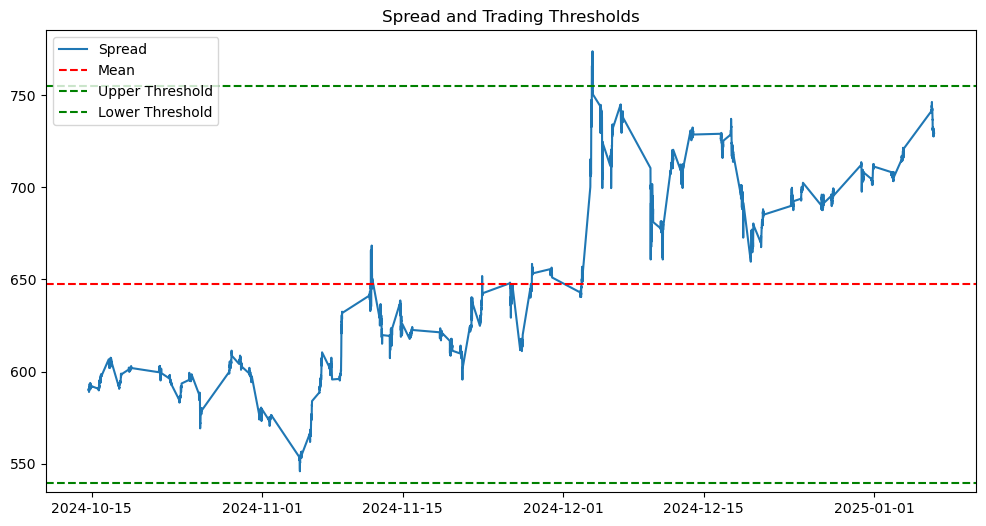

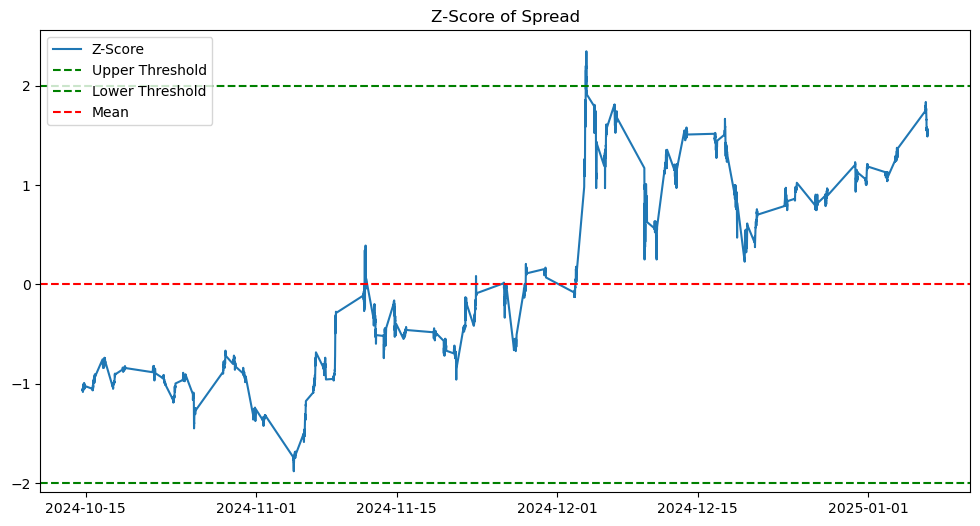

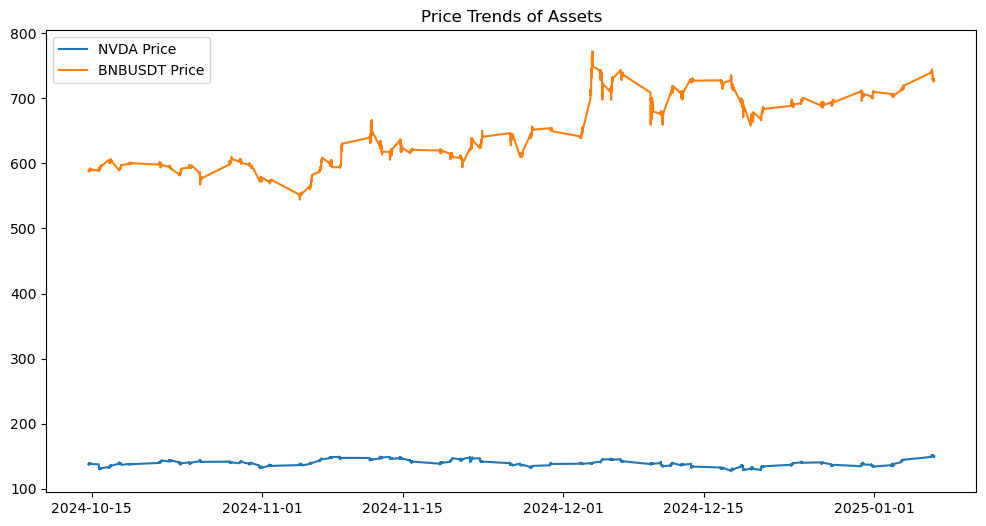

In [19]:
import matplotlib.pyplot as plt

# Plot spread
plt.figure(figsize=(12, 6))
plt.plot(spread, label='Spread')
plt.axhline(spread_mean, color='red', linestyle='--', label='Mean')
plt.axhline(spread_mean + 2 * spread_std, color='green', linestyle='--', label='Upper Threshold')
plt.axhline(spread_mean - 2 * spread_std, color='green', linestyle='--', label='Lower Threshold')
plt.title('Spread and Trading Thresholds')
plt.legend()
plt.show()

# Plot Z-score
plt.figure(figsize=(12, 6))
plt.plot(z_score, label='Z-Score')
plt.axhline(2, color='green', linestyle='--', label='Upper Threshold')
plt.axhline(-2, color='green', linestyle='--', label='Lower Threshold')
plt.axhline(0, color='red', linestyle='--', label='Mean')
plt.title('Z-Score of Spread')
plt.legend()
plt.show()

# Plot asset price trends
plt.figure(figsize=(12, 6))
plt.plot(price_pairs[ticker_eqt], label=f'{ticker_eqt} Price')
plt.plot(price_pairs[ticker_cpy], label=f'{ticker_cpy} Price')
plt.title('Price Trends of Assets')
plt.legend()
plt.show()

In [20]:
def cointegration_test(pairs):
    
    seriesX = pairs.iloc[:, 0]
    seriesY = pairs.iloc[:, 1]
    
    model = sm.OLS(seriesY, sm.add_constant(seriesX)).fit()
    hedge_ratio = model.params[1]

    spread = seriesY - hedge_ratio * seriesX

    adf_result = adfuller(spread)
    correlation = seriesX.corr(seriesY)

    return spread, adf_result, correlation

In [25]:
spread, adf_result, correlation = cointegration_test(price_pairs)

print(f"ADF Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.3f}")
print(f"Correlation: {correlation:.3f}")

if adf_result[1] < 0.05:
    print("The spread is stationary.")
else:
    print("The spread is not stationary.")

ADF Statistic: -1.2335
p-value: 0.659
Correlation: -0.137
The spread is not stationary.


In [26]:
%%time
i = 0
list_results = []

for ticker_eqt in list_equity:
    for ticket_cpy in list_crypto:   
        i += 1
        
        # Prepare for pair prices
        price_pairs = process_pairs_series(ticker_eqt, ticker_cpy, dict_equity_df, dict_crypto_df)
        spread, adf_result, correlation = cointegration_test(price_pairs)

        # Unpack adf_result for better readability
        adf_statistic, p_value, _, num_observations, *_ = adf_result

        # Check for stationarity
        spread_stationary = p_value < 0.05

        # Store results
        list_results.append({
            "seriesX": ticker_eqt,
            "seriesY": ticket_cpy,
            "ADF_statistic": adf_statistic,
            "p-value": p_value,
            "correlation": correlation,
            "num_observations": num_observations,
            "spread_stationary": spread_stationary,
        })

print(f"# of Equity-Crypto Pairs: {i}")

# of Equity-Crypto Pairs: 170
CPU times: user 28.6 s, sys: 18.1 s, total: 46.7 s
Wall time: 12.3 s


In [27]:
df_results = pd.DataFrame(list_results)

In [28]:
df_results.spread_stationary.value_counts()

spread_stationary
False    130
True      40
Name: count, dtype: int64

In [29]:
df_results[df_results['spread_stationary']==True]

,seriesX,seriesY,ADF_statistic,p-value,correlation,num_observations,spread_stationary
30,AMZN,ADAUSDT,-3.333231,0.013457,0.868269,4455,True
31,AMZN,AVAXUSDT,-3.333231,0.013457,0.868269,4455,True
32,AMZN,BNBUSDT,-3.333231,0.013457,0.868269,4455,True
33,AMZN,BTCUSDT,-3.333231,0.013457,0.868269,4455,True
34,AMZN,DOGEUSDT,-3.333231,0.013457,0.868269,4455,True
35,AMZN,ETHUSDT,-3.333231,0.013457,0.868269,4455,True
36,AMZN,SOLUSDT,-3.333231,0.013457,0.868269,4455,True
37,AMZN,TRXUSDT,-3.333231,0.013457,0.868269,4455,True
38,AMZN,USDCUSDT,-3.333231,0.013457,0.868269,4455,True
39,AMZN,XRPUSDT,-3.333231,0.013457,0.868269,4455,True


In [49]:
sample_pairs = df_results[df_results['spread_stationary']==True].sample()
print(sample_pairs)

   seriesX  seriesY  ADF_statistic   p-value  correlation  num_observations  \
47    META  TRXUSDT      -3.526056  0.007343     0.772701              4447   

    spread_stationary  
47               True  


In [58]:
tickerX = sample_pairs['seriesX'].values[0]
tickerY = sample_pairs['seriesY'].values[0]
print(tickerX, tickerY)

price_pairs = process_pairs_series(tickerX, tickerY, dict_equity_df, dict_crypto_df)
price_pairs.head()

META TRXUSDT


,META,TRXUSDT
Date,,
2024-10-14 16:30:00,593.14,0.1607
2024-10-14 16:35:00,593.52,0.1606
2024-10-14 16:40:00,594.72,0.1606
2024-10-14 16:45:00,595.33,0.1605
2024-10-14 16:50:00,596.44,0.1606


In [65]:
def cointegration_plot(price_pairs):

    tickerX, tickerY = price_pairs.columns.tolist()
    
    spread, adf_result, correlation = cointegration_test(price_pairs)
    print(f"ADF Statistic: {adf_result[0]:.4f}")
    print(f"p-value: {adf_result[1]:.3f}")
    print(f"Correlation: {correlation:.3f}")

    if adf_result[1] < 0.05:
        print("The spread is stationary.")
    else:
        print("The spread is not stationary.")

    spread_mean = spread.mean()
    spread_std = spread.std()
    z_score = (spread - spread_mean) / spread_std
    
    # Plot spread
    plt.figure(figsize=(12, 6))
    plt.plot(spread, label='Spread')
    plt.axhline(spread_mean, color='red', linestyle='--', label='Mean')
    plt.axhline(spread_mean + 2 * spread_std, color='green', linestyle='--', label='Upper Threshold')
    plt.axhline(spread_mean - 2 * spread_std, color='green', linestyle='--', label='Lower Threshold')
    plt.title('Spread and Trading Thresholds')
    plt.legend()
    plt.show()
    
    # Plot Z-score
    plt.figure(figsize=(12, 6))
    plt.plot(z_score, label='Z-Score')
    plt.axhline(2, color='green', linestyle='--', label='Upper Threshold')
    plt.axhline(-2, color='green', linestyle='--', label='Lower Threshold')
    plt.axhline(0, color='red', linestyle='--', label='Mean')
    plt.title('Z-Score of Spread')
    plt.legend()
    plt.show()

    price_normalized = price_pairs / price_pairs.iloc[0]

    # Plot the normalized prices
    plt.figure(figsize=(12, 6))
    plt.plot(price_normalized[tickerX], label=f'{tickerX} (Normalized)', linestyle='-')
    plt.plot(price_normalized[tickerY], label=f'{tickerY} (Normalized)', linestyle='--')
    plt.title(f'Price Correlation of {tickerX} and {tickerY} (Normalized)')
    plt.xlabel('Time')
    plt.ylabel('Normalized Price')
    plt.legend()
    plt.grid(True)
    plt.show()

ADF Statistic: -3.2935
p-value: 0.015
Correlation: 0.751
The spread is stationary.


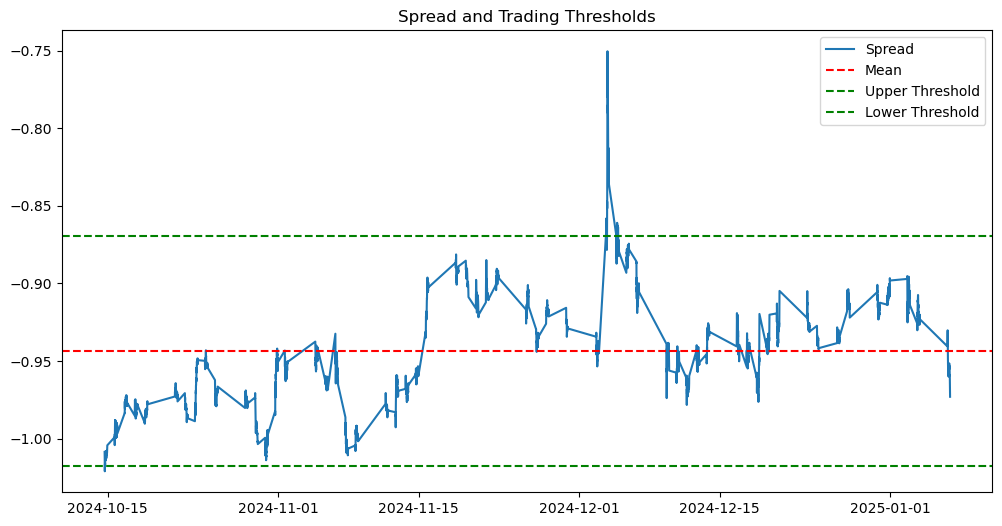

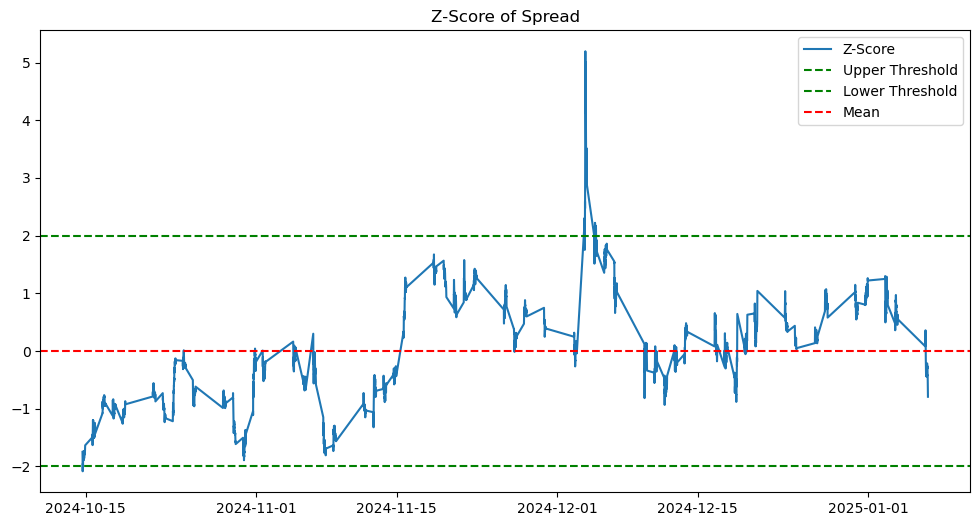

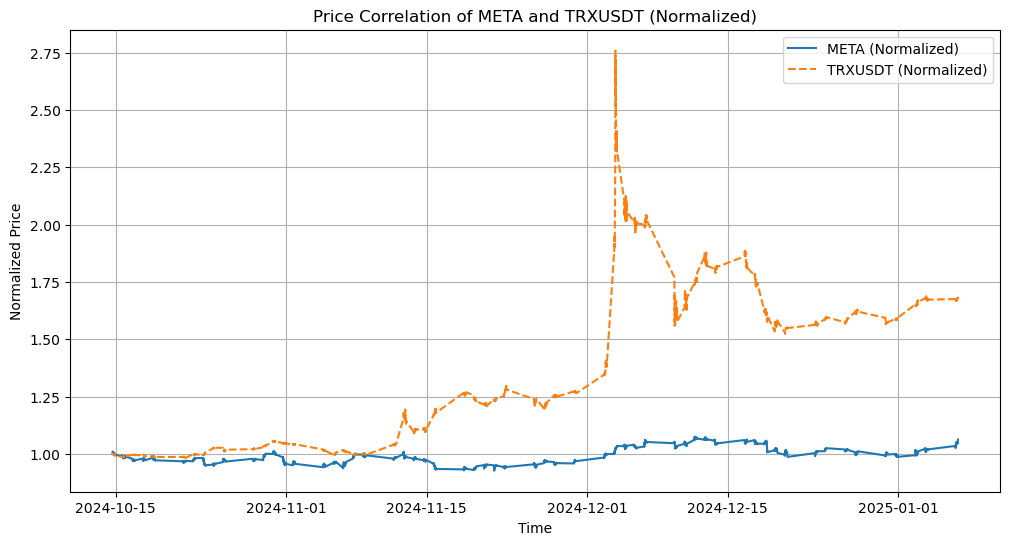

In [66]:
cointegration_plot(price_pairs)

In [64]:
price_pairs.corr()

,META,TRXUSDT
META,1.000000,0.750623
TRXUSDT,0.750623,1.000000
